In [209]:

import sys
sys.path.append('Downloads/coco/PythonAPI')
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.io as io

In [210]:
dataDir='/Users/chhaviyadav/Downloads/proj_vqa'
dataType='train2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
print(annFile)

/Users/chhaviyadav/Downloads/proj_vqa/annotations/instances_train2014.json


In [211]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=10.40s)
creating index...
index created!


In [212]:
# display COCO categories and supercategories
intarr=coco.getCatIds()
print(intarr)
cats = coco.loadCats(coco.getCatIds())
print(cats)
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))
print(len(nms))
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))
print(len(nms))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 's

In [220]:
# get all images containing given categories, select one at random
ids=coco.getImgIds();
rand_id=np.random.randint(0,len(ids));
#img=coco.loadImgs(ids[rand_id])
img=coco.loadImgs(439089);

[{'license': 1, 'file_name': 'COCO_train2014_000000439089.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000439089.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-15 02:32:09', 'flickr_url': 'http://farm2.staticflickr.com/1089/782798251_7f5f052ddb_z.jpg', 'id': 439089}]


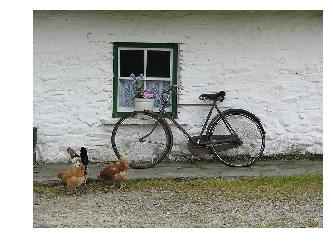

In [221]:
print(img)
I = io.imread(img[0]['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

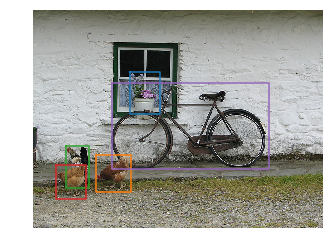

In [222]:
# load and display instance boxes
plt.figure(1)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img[0]['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
bboxes=[coco.loadAnns(ids=annIds[i])[0]['bbox'] for i in range(0,len(annIds))]
x=[[bboxes[i][0],bboxes[i][0]+bboxes[i][2]] for i in range(0,len(annIds))]
y=[[bboxes[i][1],bboxes[i][1]+bboxes[i][3]] for i in range(0,len(annIds))]
for i in range(0,len(annIds)):
    plt.plot([x[i][0],x[i][1],x[i][1],x[i][0],x[i][0]],[y[i][0],y[i][0],y[i][1],y[i][1],y[i][0]])

In [239]:
from operator import itemgetter 
print(anns)
cats=[anns[i]['category_id']  for i in range(0,len(annIds))]
cats=coco.loadCats(ids=cats)
cats=[cat['name'] for cat in cats]
print(cats)
questions=[]
answers=[]
x_starts=[[x[i][0],cats[i],anns[i]['id']] for i in range(0,len(annIds))]
print(x_starts)
sorted_x=sorted(x_starts,key=itemgetter(0))
print(sorted_x)
questions.append('What is leftmost object in the image?.json')
answers.append('{}.json'.format(sorted_x[-1][1]))

questions.append('What is rightmost object in the image?.json')
answers.append('{}.json'.format(sorted_x[0][1]))
flag=-1
flag=[1 if ((len(annIds)==1)or(len(annIds)==0))  else -1]

area=[[anns[i]['area'],anns[i]['id']] for i in range(0,len(annIds))]
value,areamax_id=max(area,key=lambda item: item[0])
ind=area.index([value,areamax_id])
ind_in_sortedx=[i for i,j in enumerate(sorted_x) if j[2]==area[ind][1]]
print('area: ')
print(area)
print(ind)
print('sorted x')
print(sorted_x)
print(ind_in_sortedx)
isx=ind_in_sortedx[0]

if ((isx != (len(annIds)-1)) and (isx != 0) and flag==[-1]):
    
    questions.append('What is to the right of {}'.format(cats[ind]))
    answers.append('{}.json'.format(sorted_x[isx + 1][1]))
    questions.append('What is to the left of {}'.format(cats[ind]))
    answers.append('{}.json'.format(sorted_x[isx-1][1]))
   
if ((ind_in_sortedx == (len(annIds)-1))and flag==[-1]):
    questions.append('What is to the left of {}'.format(cats[ind]))
    answers.append('{}.json'.format(sorted_x[isx-1][1]))
                   
    
if ((ind_in_sortedx == 0)and flag==[-1]):
    questions.append('What is to the right of {}'.format(cats[ind]))
    answers.append('{}.json'.format(sorted_x[isx+1][1]))
    
    
print(questions)
print(answers)
#answer3='{}.json'.format()
#question4='What is to the right of {}'.format(cats[i])


[{'segmentation': [[271.48, 196.85, 268.39, 227.81, 242.58, 222.65, 222.97, 222.65, 218.84, 193.75, 220.9, 184.46, 214.71, 160.72, 212.65, 139.04, 221.94, 135.94, 233.29, 150.39, 244.65, 138.01, 251.87, 171.04, 251.87, 178.27, 266.32, 170.01, 272.52, 156.59, 279.74, 174.14, 270.45, 184.46, 269.42, 186.52, 274.58, 205.1]], 'area': 3773.5360499999997, 'iscrowd': 0, 'image_id': 439089, 'bbox': [212.65, 135.94, 67.09, 91.87], 'category_id': 64, 'id': 19108}, {'segmentation': [[191.35, 397.3, 202.49, 389.87, 199.3, 384.57, 199.84, 376.61, 207.26, 371.3, 209.92, 354.85, 214.69, 347.42, 212.57, 341.06, 215.75, 326.73, 210.98, 320.89, 199.3, 318.77, 191.35, 321.95, 188.16, 330.97, 160.57, 343.71, 154.73, 348.48, 148.89, 355.38, 145.71, 359.1, 144.65, 363.34, 141.46, 360.16, 139.34, 364.93, 145.18, 377.67, 152.61, 376.61, 155.26, 372.36, 167.47, 375.55, 177.02, 376.61, 179.14, 380.32, 177.02, 385.1, 172.77, 387.75, 170.12, 389.34, 163.22, 387.22, 169.59, 393.59, 170.12, 399.43, 175.43, 395.71, 